In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from pathlib import Path
from imageio import imread
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

#data source: https://www.kaggle.com/datasets/alihasnainch/fruits-dataset-for-classification?resource=download

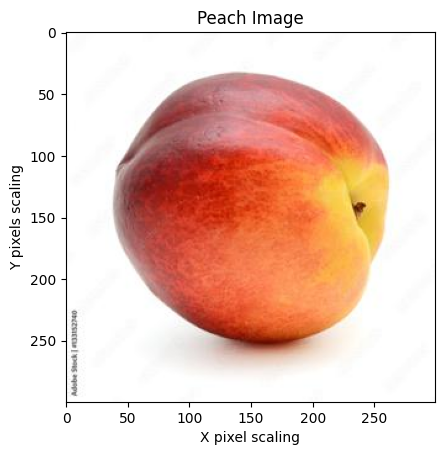

In [2]:
plt.title("Peach Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
peach_image = mpimg.imread('fresh_peaches_done/fresh_peach_1.jpg')
plt.imshow(peach_image)
plt.show()

In [3]:
peach= cv2.imread('fresh_peaches_done/fresh_peach_1.jpg')
peach_vector= cv2.cvtColor(peach, cv2.COLOR_BGR2RGB)
print(peach_vector)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[252 252 252]
  [253 253 253]
  [254 254 254]
  ...
  [253 253 253]
  [252 252 252]
  [251 251 251]]

 [[252 252 252]
  [253 253 253]
  [254 254 254]
  ...
  [253 253 253]
  [252 252 252]
  [251 251 251]]

 [[252 252 252]
  [253 253 253]
  [254 254 254]
  ...
  [253 253 253]
  [252 252 252]
  [251 251 251]]]


In [4]:
print(peach_vector.shape, type(peach_vector))

(300, 300, 3) <class 'numpy.ndarray'>


In [5]:
def vectorize (directory, label):
    
    """
    vectorizes images in a directory and assigns label to them
 
    Args:
        directory (str): the directory path
        label (int): the class label of the images in that directory
 
    Returns:
        list: a list of vectors of the images in the directory
    """
    
    fruit = []
    # iterate over files in that directory
    file_names = Path(directory).glob('*')   #returns the name of each file
    for file_name in file_names:
        image = cv2.imread(str(file_name))
        vector= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        fruit.append((vector, label))
    
    return fruit

In [6]:
peaches= vectorize ('./fresh_peaches_done', 0)

print(len(peaches))
print(peaches[0][1])
print(peaches[0][0][0])

250
0
[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [254 254 254]
 [254 254 254]
 [254 254 254]
 [254 254 254]
 [254 254 254]
 [254 254 254]
 [254 254 254]
 [254 254 254]
 [252 252 252]
 [252 252 252]
 [252 252 252]
 [253 253 253]
 [253 253 253]
 [254 254 254]
 [254 254 254]
 [254 254 254]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [254 254 254]
 [253 253 253]
 [253 253 253]
 [252 252 252]
 [25

In [7]:
pomegranates= vectorize ('./fresh_pomegranates_done', 1)

In [8]:
strawberries= vectorize ('./fresh_strawberries_done', 2)

In [9]:
fruits= peaches + pomegranates + strawberries
len(fruits)

811

In [10]:
import random
random.seed(17)

random.shuffle(fruits)
print(fruits[0][1], fruits[13][1], fruits[100][1])

0 2 1


In [11]:
print(fruits[0][0].shape, fruits[13][0].shape, fruits[27][0].shape)

(300, 300, 3) (300, 300, 3) (300, 300, 3)


In [12]:
y= np.array([])
    
for tuple in fruits:
    unit_y= tuple[1]
    y= np.append(y, unit_y)
    
print(y[:10])

[0. 1. 1. 1. 0. 2. 1. 2. 2. 0.]


In [13]:
y_copy= y.copy()  #keeping a copy of y before one-hot encoding, in case I need it

In [14]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y)  
print(type(y),'\n', y[2:6])

#tf.one_hot can also be used for one-hot encoding; 
#however, its output is a tensorflow.python.framework.ops.EagerTensor, 
#which is not an acceptable data type for train_test_split

<class 'numpy.ndarray'> 
 [[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [15]:
x= []
    
for tuple in fruits:
    unit_x= tuple[0]
    x.append(unit_x)

print(len(x), type(x[0]))

811 <class 'numpy.ndarray'>


In [16]:
for i in range(0, 42):
    x[i]= np.array(x[i], np.float32)/255   #normalizing the pixel values

In [17]:
x= np.array(x)
x.shape

(811, 300, 300, 3)

In [18]:
print(x.shape, y.shape)

(811, 300, 300, 3) (811, 3)


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.15, random_state=17, stratify=y)

In [21]:
print(len(x_train), len(x_test))

689 122


In [22]:
model = Sequential()

model.add(Flatten(input_shape=(300, 300, 3)))
model.add(Dense(3, activation='softmax')) #this is the output layer, 3 is the number of classes

In [23]:
model.compile(optimizer='RMSProp', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=30, batch_size=10)

Epoch 1/30
69/69 [==============================] - 3s 23ms/step - loss: 38951.1367 - accuracy: 0.3614
Epoch 2/30
69/69 [==============================] - 1s 21ms/step - loss: 34674.2812 - accuracy: 0.3483
Epoch 3/30
69/69 [==============================] - 1s 21ms/step - loss: 26673.2051 - accuracy: 0.4485
Epoch 4/30
69/69 [==============================] - 1s 21ms/step - loss: 26069.2520 - accuracy: 0.4601
Epoch 5/30
69/69 [==============================] - 2s 23ms/step - loss: 23644.9570 - accuracy: 0.4804
Epoch 6/30
69/69 [==============================] - 1s 21ms/step - loss: 26273.8047 - accuracy: 0.4572
Epoch 7/30
69/69 [==============================] - 1s 21ms/step - loss: 23568.6289 - accuracy: 0.4746
Epoch 8/30
69/69 [==============================] - 1s 21ms/step - loss: 23249.3340 - accuracy: 0.4731
Epoch 9/30
69/69 [==============================] - 1s 21ms/step - loss: 21534.0938 - accuracy: 0.5239
Epoch 10/30
69/69 [==============================] - 1s 21ms/step - loss:

In [25]:
metrics = model.evaluate(x_test, y_test)

print(metrics)
print('Accuracy:', metrics[1])

4/4 [==============================] - 0s 12ms/step - loss: 20152.4590 - accuracy: 0.6066
[20152.458984375, 0.6065573692321777]
Accuracy: 0.6065573692321777


In [26]:
y_pred = model.predict(x_test)
class_label = np.argmax(y_pred, 1)
class_label[:5]

#Returns the index with the largest value across axes of a tensor.
#for example,index 0 corresponds to one-hot encoding for peach, and 2 corresponds to strawberry

4/4 [==============================] - 0s 11ms/step


array([0, 0, 2, 0, 2], dtype=int64)

In [27]:
# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i, label in enumerate(class_label[:5]):
  print("{:25} | {}".format(label, y_test[:5][i]))

Rounded Model Predictions | True labels
                        0 | [0. 1. 0.]
                        0 | [1. 0. 0.]
                        2 | [0. 0. 1.]
                        0 | [0. 0. 1.]
                        2 | [0. 1. 0.]


In [28]:
def naming(array):
    
    """
    Assign name to class labels
 
    Args:
        array (np.array): an array of predicted class labels
 
    Returns:
        list: a list of fruit names corresponding to the predicted class labels
    """
    
    names= []
    
    for x in array:
        if x== 0:
            names.append('peach')
        elif x== 1:
            names.append('pomegranate')
        else:
            names.append('strawberry')
    return names

In [29]:
fruit_name= naming(class_label)  #refer to the one-hot encoding

print(fruit_name[:10])

['peach', 'peach', 'strawberry', 'peach', 'strawberry', 'strawberry', 'peach', 'peach', 'strawberry', 'peach']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

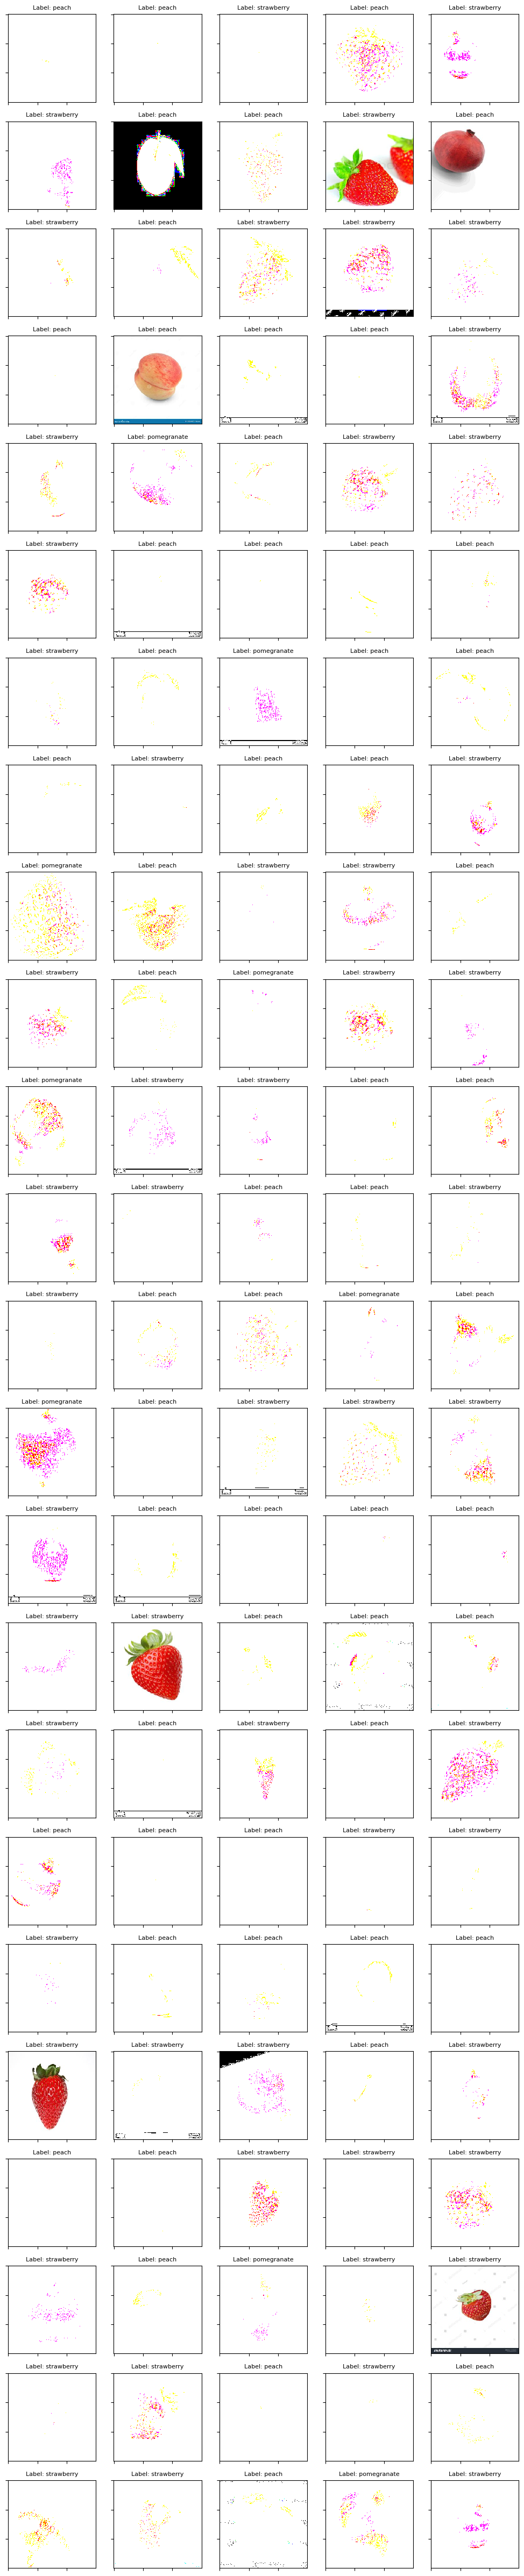

In [30]:
#x_test_image = np.reshape(x_test, [-1, 300, 300, 3])
num_row = 24
num_col = 5  # plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2 * num_col, 2 * num_row))

for i in range(120):
    ax = axes[
        i // num_col,
        i % num_col
    ]

    ax.imshow(x_test[i, :, :], interpolation='nearest', alpha=1, vmin=0, vmax=1)
    ax.set_title("Label: {}".format(fruit_name[i]), fontdict= {'fontsize': 8})
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)

plt.tight_layout()
plt.show()